### Set path to original pyNeuroChem. Please change to your own path

In [1]:
import sys
sys.path.append('/home/olexandr/notebooks/ASE_ANI/lib')
from ase_interface import ANI, ANID3, D3

In [2]:
import numpy as np
import time
import glob
import pandas as pd

# ASE
import  ase
from ase.io import read, write
from ase.optimize import BFGS, LBFGS 
from ase.calculators.mopac import MOPAC


#figure plotting
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read geometry from xyz file

In [3]:
geometry = read('data/b2_opt.xyz')

In [4]:
geometry.set_calculator(ANI())
e = geometry.get_potential_energy()
print('Tital ANI energy', e, 'eV')

Tital ANI energy -12635.3897015 eV


In [5]:
geometry.set_calculator(ANID3())
e_ad = geometry.get_potential_energy()
print('Tital ANI-D3 energy', e_ad, 'eV')

Tital ANI-D3 energy -12636.4697389 eV


In [6]:
geometry.set_calculator(D3())
e_d3 = geometry.get_potential_energy()
print('Tital D3 correction energy', e_d3, 'eV')

Tital D3 correction energy -1.0800373916649717 eV


# Dimer scan from S66 database

In [7]:
base_path = 'data/S66x10/Geometries/'

slides = ['0.7', '0.8' , '0.9', '0.95', '1.0', '1.05', '1.1', '1.25', '1.5', '2.0']

shift = np.array( [0.7, 0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.25, 1.5, 2.0])

#fname = 'S66by10_58_'
refQM = pd.read_csv('data/S66x10/ref_QM_data.csv')

Define structure number from S66 [1 to 66]

In [8]:
i = 1
fname = 'S66by10_' + str(i) + '_'

In [9]:
energies = []
energies_d3 = []
energies_mop = []

In [10]:
for sl in slides:
    filename = base_path + fname + sl + '_dimer.xyz'
    geometry = read(filename)
    geometry.set_calculator(ANI())
    energies.append(geometry.get_potential_energy())
    geometry.set_calculator(ANID3())
    energies_d3.append(geometry.get_potential_energy())
    geometry.set_calculator(MOPAC(method='PM7'))
    energies_mop.append(geometry.get_potential_energy())

In [11]:
filename = base_path + fname +  '2.0_monomerA.xyz'
geometry1 = read(filename)
geometry1.set_calculator(ANI())
m1 = geometry1.get_potential_energy()

filename = base_path + fname +  '2.0_monomerB.xyz'
geometry2 = read(filename)
geometry2.set_calculator(ANI())
m2 = geometry2.get_potential_energy()

In [12]:
filename = base_path + fname +  '2.0_monomerA.xyz'
geometry1 = read(filename)
geometry1.set_calculator(ANID3())
m1d3 = geometry1.get_potential_energy()

filename = base_path + fname +  '2.0_monomerB.xyz'
geometry2 = read(filename)
geometry2.set_calculator(ANID3())
m2d3 = geometry2.get_potential_energy()

In [13]:
filename = base_path + fname +  '2.0_monomerA.xyz'
geometry1 = read(filename)
geometry1.set_calculator(MOPAC(method='PM7'))
m1_mop = geometry1.get_potential_energy()

filename = base_path + fname +  '2.0_monomerB.xyz'
geometry2 = read(filename)
geometry2.set_calculator(MOPAC(method='PM7'))
m2_mop = geometry2.get_potential_energy()

In [14]:
dE = np.array(energies) - (m1+m2)
dE_d3 = np.array(energies_d3) - (m1d3+m2d3)
dE_mop = np.array(energies_mop) - (m1_mop+m2_mop)

In [15]:
best_qm = refQM[refQM['System #']==i]['Benchmark'].values
title = refQM[refQM['System #']==i]['System'].values[0]

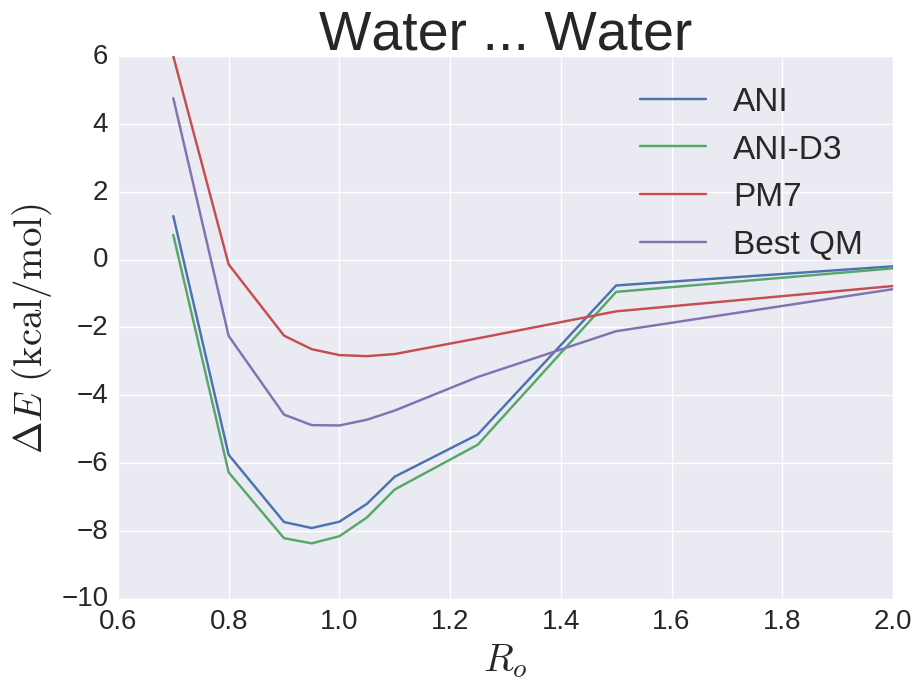

In [16]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
plt.figure()
plt.plot(shift, dE*23.06, label='ANI')
plt.plot(shift, dE_d3*23.06, label='ANI-D3')
plt.plot(shift, dE_mop*23.06, label='PM7')
plt.plot(shift, best_qm, label='Best QM')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$ R_{o}$', fontsize=28)
plt.ylabel(r'$ \Delta E\ \mathrm{(kcal/mol)}$', fontsize=28)

plt.title(title, fontsize=40)
#outfile = 
#plt.savefig(outfile, bbox_inches="tight", dpi=300) 
plt.show()